In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import math
from operator import itemgetter
from scipy import interpolate
from ctypes import *
from scipy import ndimage
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFilter
import cv2 

# Устранение шумов на бинарном изображении. 

Используя встроенные функции

Средний фильтр

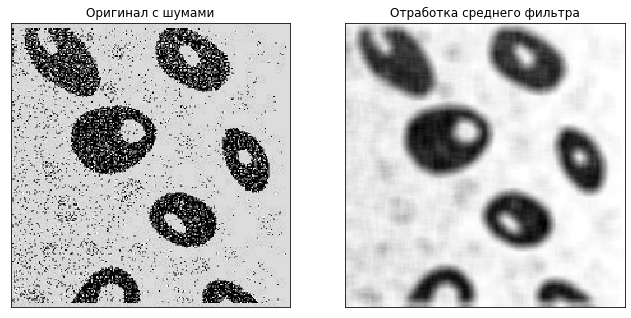

In [2]:
image = cv2.imread('images/1.JPG') # считываем изображение
image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
figure_size = 9 # задаём размерность 
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), 
plt.imshow(image, cmap='gray'),
plt.title('Оригинал с шумами')
plt.xticks([]), 
plt.yticks([])
plt.subplot(122), 
plt.imshow(new_image, cmap='gray'),
plt.title('Отработка среднего фильтра')
plt.xticks([]),
plt.yticks([])
plt.show()

Медианный фльтр

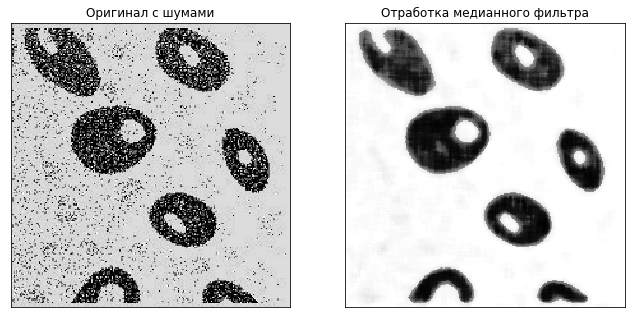

In [3]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121),
plt.imshow(image, cmap='gray'),
plt.title('Оригинал с шумами')
plt.xticks([]), 
plt.yticks([])
plt.subplot(122),
plt.imshow(new_image, cmap='gray'),
plt.title('Отработка медианного фильтра')
plt.xticks([]),
plt.yticks([])
plt.show()

Своя реализация фильтра

In [4]:
def pixel_mean_count(arr_image, i, j, count_true, count_false):
    #будем подсчитывать количество нулевых и единичных пикселей
    if arr_image.getpixel((i, j)):
        count_true += 1
    else:
         count_false += 1
    return count_true, count_false

In [5]:
def set_new_color(arr_image,i,j,color,left_pix,right_pix,down_pix,up_pix,left_up_pix,left_down_pix,right_up_pix,right_down_pix):
    arr_image.point([i,j],fill = color)
    
    #в зависимости от значения ядра окрашиваем пиксель
    if left_pix:
        arr_image.point([i-1,j],fill=color)
    if right_pix:
        arr_image.point([i+1,j],fill=color)
    if up_pix:
        arr_image.point([i,j-1],fill=color)
    if down_pix:
        arr_image.point([i,j+1],fill=color)
    if left_up_pix:
        arr_image.point([i-1,j-1],fill=color)
    if left_down_pix:
        arr_image.point([i-1,j+1],fill=color)
    if right_up_pix:
        arr_image.point([i+1,j-1],fill=color)
    if right_down_pix:
        arr_image.point([i+1,j+1],fill=color)

In [6]:
def set_new_pixel(arr_image, i, j, w, h, new_image):
    #после перехода к новому пикселю обнуляем все параметры и пересчитываем количество нулевых и единичных пикселей
    
    count_true, count_false = 0, 0  #будем подсчитывать количество нулевых и единичных пикселей
    #true_values=0
    #false_values=0
    count_true, count_false = pixel_mean_count(arr_image, i, j, count_true, count_false)
    #устанавливаем значения ядра для подсчёта
    
    left_pix=False
    right_pix=False
    down_pix=False
    up_pix=False
    left_up_pix=False
    left_down_pix=False
    right_up_pix=False
    right_down_pix=False
    
    # подсчитываем количество нулевых и единичных пикселей на позициях окна и меняем значения ядра
    if i-1 >= 0:
        count_true,count_false=pixel_mean_count(arr_image,i-1,j,count_true,count_false)
        left_pix=True
    if i+1 < w:
        count_true,count_false=pixel_mean_count(arr_image,i+1,j,count_true,count_false)
        right_pix=True
    if j-1 >= 0:
        count_true,count_false=pixel_mean_count(arr_image,i,j-1,count_true,count_false)
        up_pix=True
    if j+1 < h:
        count_true,count_false=pixel_mean_count(arr_image,i,j+1,count_true,count_false)
        down_pix=True
    if i-1 >= 0 and j-1 >= 0:
        count_true,count_false=pixel_mean_count(arr_image,i-1,j-1,count_true,count_false)
        left_up_pix=True
    if i-1 >=0 and j+1 <h:
        count_true,count_false=pixel_mean_count(arr_image,i-1,j+1,count_true,count_false)
        left_down_pix=True
    if i+1 <w and j-1 >=0:
        count_true,count_false=pixel_mean_count(arr_image,i+1,j-1,count_true,count_false)
        right_up_pix=True
    if i+1 <w and j+1 <h:
        count_true,count_false=pixel_mean_count(arr_image,i+1,j+1,count_true,count_false)
        right_down_pix=True
    if count_true>count_false:
        set_new_color(new_image,i,j,(255,255,255),left_pix,right_pix,down_pix,up_pix,left_up_pix,left_down_pix,right_up_pix,right_down_pix)
    if count_true<count_false:
        set_new_color(new_image,i,j,(0,0,0),left_pix,right_pix,down_pix,up_pix,left_up_pix,left_down_pix,right_up_pix,right_down_pix)
    if count_true==count_false:
        if arr_image.getpixel((i, j)):
             set_new_color(new_image,i,j,(255,255,255),left_pix,right_pix,down_pix,up_pix,left_up_pix,left_down_pix,right_up_pix,right_down_pix)
        else:
            set_new_color(new_image,i,j,(0,0,0),left_pix,right_pix,down_pix,up_pix,left_up_pix,left_down_pix,right_up_pix,right_down_pix)

#если больше единиц, то закрашываем максимальным значением и наоборот

In [7]:
def median_for_binary(arr_image):
    w, h = arr_image.width, arr_image.height  #высота изображения и длина изображения
    new_image=Image.new(mode="RGB",size=(w,h)) #создаём новое изображение, в котором не будет шумов
    for i in range(0,w,2):
        for j in range(0,h,2):
            set_new_pixel(arr_image, i, j, w, h, ImageDraw.Draw(new_image)) #двигаемся по каждому пикселю иображения и рисуем в новом изображении
    return new_image

In [8]:
image = Image.open('images/1.jpg') #Открываем изображение. 
copy_image = image.copy() #создаём копию
copy_image=copy_image.convert('1')

binary = median_for_binary(copy_image)
binary.save("images/Устранение шумов на бинарном изображении.jpg", "JPEG") #сохраняем готовое изображение

# Устранение шумов на полутоновом изображении (усредняющий и медианный фильтр)

In [9]:
def median_for_halftone(arr, size_of_filter):
    locality = [] #окрестность пикселя
    indexer = size_of_filter // 2 #размер ядра фильтра
    w, h = len(arr), len(arr[0])  #высота изображения и длина изображения
    res_arr = np.zeros((w,h)) #создаем итоговое изображение
    for i in range(w):
        for j in range(h):
            for z in range(size_of_filter):
                if ((i + z - indexer < 0) or (i + z - indexer > len(arr) - 1)):
                    for c in range(size_of_filter):
                        locality.append(0)
                else:
                    if ((j + z - indexer < 0) or (j + indexer > len(arr[0]) - 1)):
                        locality.append(0)
                    else:
                        for k in range(size_of_filter):
                            locality.append(arr[i + z - indexer][j + k - indexer])
                            
            #упорядочиваем элементы 
            locality.sort()
            res_arr[i][j] = locality[len(locality) // 2]  #выбираем "средний по номеру" элемент
            locality = []
    return res_arr

In [10]:
img_halftone = Image.open("images/5.jpg").convert("L")

result = median_for_halftone(np.array(img_halftone), 5)
plt.imsave('images/Устранение шумов в полутоновом изображении.jpg', result, cmap=plt.get_cmap('gray'))